<a href="https://colab.research.google.com/github/DietzscheNostoevsky/Learning_Pytorch/blob/main/CNN_tf_v_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing the same model in both Tensorflow and Pytorch

# Model
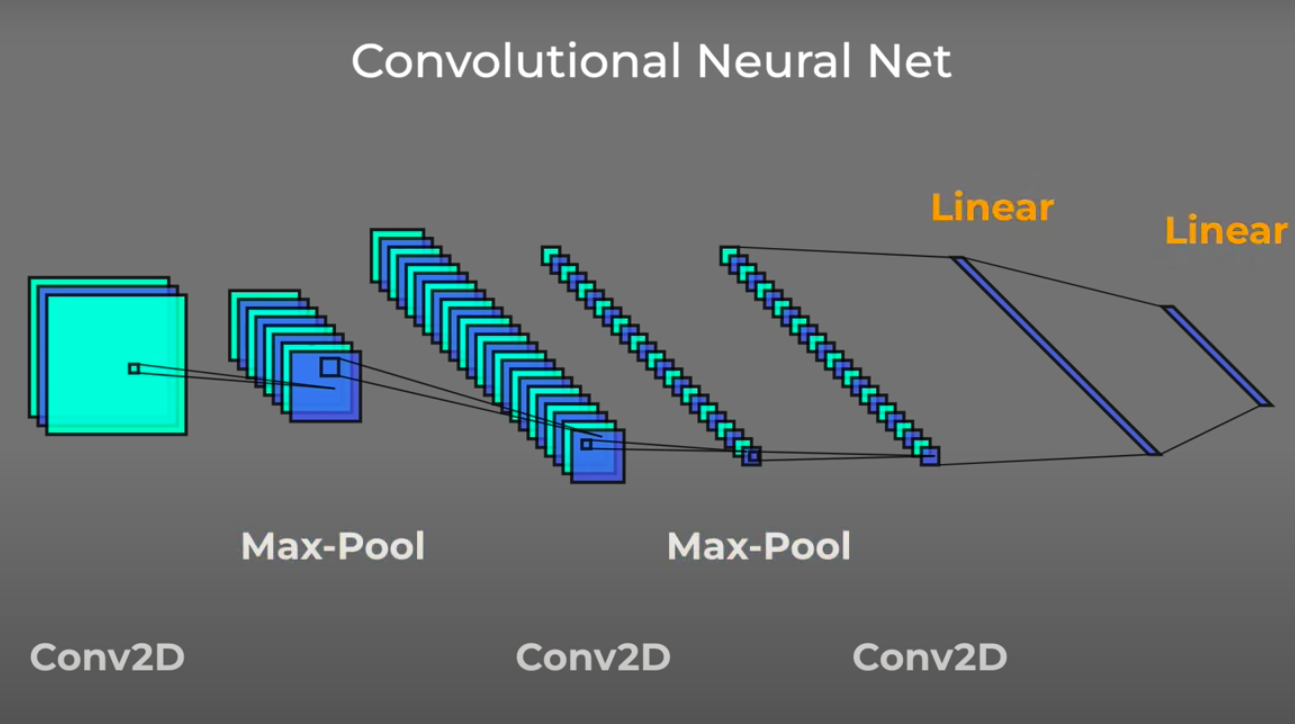

# Tensorflow

## Setup

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt 

## Dataset : 

cifar10

In [2]:
# Dataset

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizing the data so pixel values are between 0 and 1

train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
test_images.shape

(10000, 32, 32, 3)

### Plotting the images 

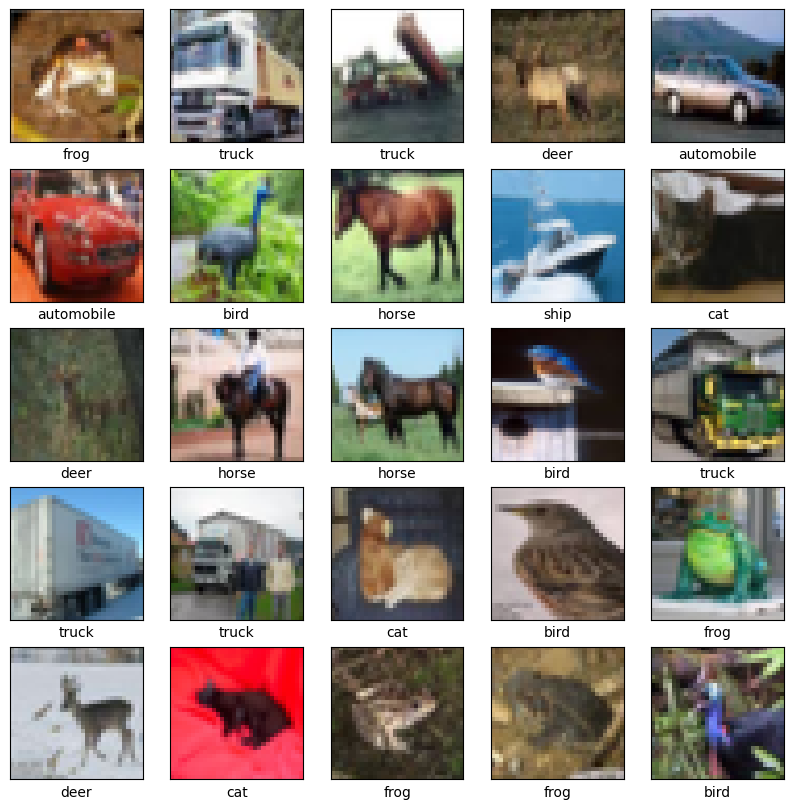

In [5]:
# Plot images

classes = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

plt.figure(figsize=(10,10))

for i in  range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(classes[train_labels[i][0]])
plt.show()


## Model Architecture

In [6]:
# Model 
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


## Model Compilation

In [7]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## Training

In [8]:
# Training 
import time
t0 = time.time()
history = model.fit(train_images, train_labels, 
                    epochs=10,
                    validation_split=0.2)
print(F"Took {time.time()-t0:.2f} secs to train")

Epoch 1/10
1250/1250 [==============================] - 17s 5ms/step - loss: 1.5892 - accuracy: 0.4163 - val_loss: 1.3426 - val_accuracy: 0.5196
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2415 - accuracy: 0.5558 - val_loss: 1.1521 - val_accuracy: 0.5899
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0993 - accuracy: 0.6085 - val_loss: 1.0859 - val_accuracy: 0.6200
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9892 - accuracy: 0.6513 - val_loss: 1.0189 - val_accuracy: 0.6449
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9120 - accuracy: 0.6794 - val_loss: 0.9744 - val_accuracy: 0.6630
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8433 - accuracy: 0.7022 - val_loss: 0.9158 - val_accuracy: 0.6842
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7895 - accuracy: 0.7226 - val_loss: 0.9153 - val_accuracy

## Training History

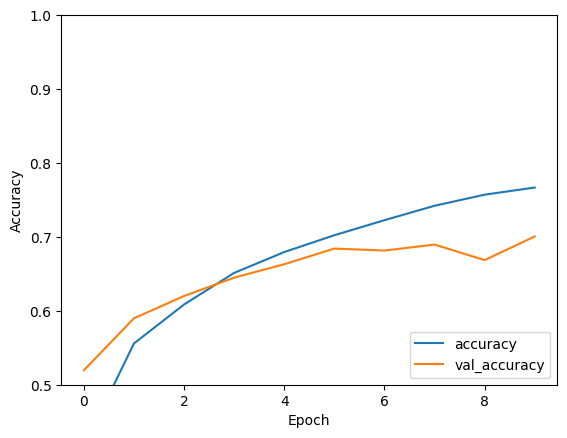

In [9]:
# Plot History 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5,1])
plt.legend(loc="lower right")


## Model Evaluation


In [10]:
# Evaluate 

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(test_loss, test_accuracy)

313/313 - 1s - loss: 0.9030 - accuracy: 0.6975 - 655ms/epoch - 2ms/step
0.9030328989028931 0.6974999904632568


# ----------------------------------------------------------------

# Pytorch

## Setup

In [11]:
# Imports 

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

import matplotlib.pyplot as plt 
import numpy as np 

In [12]:
# Device Setup

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # for cross device 
print(device)

cuda


## Hyperparameter

In [13]:
batch_size = 32


## Loading the Dataset

In [24]:
# Dataset and Dataloader

transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5, 0.5))]
    )

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, 
                                          shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


## Ploting the Dataset 

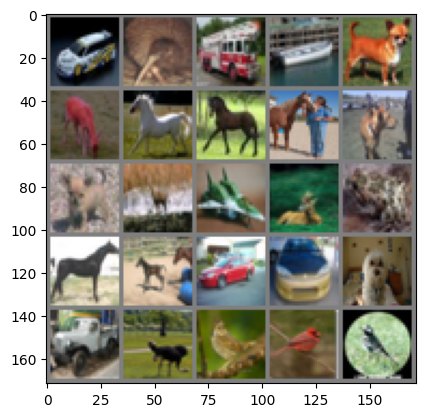

automobilebird truckship dog  deer horsehorsehorsedog  dog  deer airplanedeer frog horsehorseautomobileautomobiledog  truckbird bird bird bird 


In [25]:
# Plot 

classes = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

def imshow(imgs):
    imgs = imgs / 2 + 0.5 # Unnormalizing the image
    npimgs = imgs.numpy()
    plt.imshow(np.transpose(npimgs, (1,2,0)))
    plt.show()

# One barch of random training images 

dataiter = iter(trainloader)
images, labels = next(dataiter)

img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow(img_grid)
print("".join(F"{classes[labels[j]]:5s}" for j in range(25)))

## Model Architecture

In [26]:
# Model 

class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,32,3)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(32,64,3)
        self.conv3 = nn.Conv2d(64,64,3)
        self.fc1 = nn.Linear(64*4*4, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

# More code than tf for more flexibility 

model = ConvNet().to(device) # pushing the model to GPU


## Loss and Optimizer


In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


## Training

In [28]:
# Training 

import time 

t1 = time.time()
steps_per_epoch = len(trainloader)
for epoch in range(10):

    running_loss = 0.0
    for (inputs, labels) in trainloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward + loss 

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward + optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(F"[{epoch + 1 }] loss : {running_loss / steps_per_epoch:.3f}")

print("Finished Training")
print(F"Took {time.time()-t1:.2f} secs to train")

[1] loss : 1.501
[2] loss : 1.143
[3] loss : 0.976
[4] loss : 0.872
[5] loss : 0.794
[6] loss : 0.741
[7] loss : 0.692
[8] loss : 0.651
[9] loss : 0.615
[10] loss : 0.582
Finished Training
Took 197.71 secs to train


## Evaluation


In [29]:
n_correct = 0
n_total = 0

model.eval()

with torch.no_grad():
    for (images, labels) in testloader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs.data,1)

        n_total += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    print(F"Accuracy on test set : {n_correct / n_total :.3f}")

Accuracy on test set : 0.711


## tf vs pytorch accuracy

In [32]:
print(F"Tensorflow accuracy : {test_accuracy:.3f}")
print(F"PyTorch accuracy : {n_correct / n_total :.3f}")

Tensorflow accuracy : 0.697
PyTorch accuracy : 0.711
